# 
this notebook reviews and explains the output of `ub_diffusion_net.py`

In [1]:
import pandas as pd
import blocksci
import numpy as np
import zarr
import networkx as nx
import matplotlib.pyplot as plt

DIR_RES = "/home/nvalla/paint-black/uniform_black/"
# old
# heur2_day_file_old = DIR_RES + "heur_2_data/diffusion_net_day.csv.old"
heur2_file = DIR_RES + "heur_2_data/diffusion_block.csv"
heur2_cluster_is_black = DIR_RES + "heur_2_data/cluster_is_black_when_block.zarr"
DIR_STATS = "/mnt/hdd_data/blockchain_parsed/bitcoin/"
heur2_day_stats = DIR_STATS + "CALC-bitcoin-heur-2_day-network_base.csv"
DIR_PARSED="/mnt/hdd_data/blockchain_parsed/"
# cfg_file = f"/mnt/hdd_data/blockchain_parsed/bitcoin.cfg" # later
# chain = blocksci.Blockchain(cfg_file)


In [2]:
def binning(step, a):
    """Return array of size n//step to count sum of a values on index range of length step"""
    n = len(a)
    b = np.zeros(n//step)
    c = np.zeros(n)
    j = 0
    i = 0
    for j in range(len(b)):
        for i in range(step):
            b[j] += a[j*step+i]
    return b

# testing the code

In [3]:
from ub_diffusion_block import AddressMapper
from itertools import compress
import time

load the address map

In [4]:
chain = blocksci.Blockchain(f"{DIR_PARSED}/bitcoin.cfg")
am = AddressMapper(chain)
am.load_clusters(f"{DIR_PARSED}/bitcoin/heur_2_data/")

[INFO] #addresses: 4022303272


load address blocksci object

In [5]:
ad = "17DEJSAMHsTtsxZA1v6yu51xVwtFJ5ECfp"
#clu = 5
add_obj = chain.address_from_string(ad)

load black ground truth

In [6]:
clust_is_black_ground = zarr.load(f"test/heur_2_data/cluster_is_black_ground_truth.zarr")

transform ground truth to set object. Expected number of ground truth black users:119

In [7]:
tic = time.time()
clust_is_black_ground_set = set([str(i) for i in range(len(clust_is_black_ground)) if clust_is_black_ground[i]])
print(len(clust_is_black_ground_set))
print(time.time() - tic)

119
41.7277467250824


build same set of clust_is_black_groud_set but with int instead of str

In [8]:
tic = time.time()
cl2 = set(compress(range(len(clust_is_black_ground)), clust_is_black_ground))
print(len(cl2))
print(time.time() - tic)

119
21.689948081970215


expected output: True

it means that the cluster(which is black) is correctly recognised in cl2

In [9]:
for trx in chain.blocks[400023]:
    for out in trx.outputs:
        if add_obj == out.address:
            print('yes')
            cluster = am.cluster[am[out.address]]
            print(cluster in cl2)        

yes
True


# heur=2, curr=BTC
`python3 ub_diffusion_block.py --curr=BTC --heur=2 `

In [12]:
# heur_2 network stats
df_stats = pd.read_csv(heur2_day_stats)
# index cluster, value is the block it becomes black
cluster_is_black_when = zarr.load(heur2_cluster_is_black)
# bool array to track originally black clusters
clust_is_black_ground = zarr.load(f"{DIR_RES}/heur_2_data/cluster_is_black_ground_truth.zarr")
# index cluster, value block of first appearance on the blockchain
clust_when = zarr.load(f"{DIR_PARSED}/bitcoin/heur_2_data/cluster_appeared.zarr")

In [13]:
# block by block diffusion of black money
df = pd.read_csv(heur2_file)

# temporary hack
"""
for i in range(len(df.date)):
    while len(df.date[i])<10:
        df.date[i] += "2"
"""

data_labels = list(df.columns)
print(data_labels)

['block', 'no_old_black_clusters', 'no_new_black_clusters', 'no_black_clusters_input', 'no_black_clusters_output', 'no_old_black_clusters_output', 'no_new_black_clusters_output', 'no_black_clusters_cumulative', 'no_clusters_input', 'no_clusters_output', 'no_active_black_clusters', 'black_old2new_no_links', 'black_old2old_no_links', 'white2black_no_links', 'white2white_no_links', 'no_links', 'no_black_trxs', 'no_white_trxs', 'total_trxs']


In [14]:
df.tail()

,block,no_old_black_clusters,no_new_black_clusters,no_black_clusters_input,no_black_clusters_output,no_old_black_clusters_output,no_new_black_clusters_output,no_black_clusters_cumulative,no_clusters_input,no_clusters_output,no_active_black_clusters,black_old2new_no_links,black_old2old_no_links,white2black_no_links,white2white_no_links,no_links,no_black_trxs,no_white_trxs,total_trxs
661247,661247,1213,1202,1049,2500,1281,1219,285792432,1224,2727,2415,1219,1166,115,227,2727,1049,175,1225
661248,661248,2491,3030,2072,5984,2907,3077,285795462,2531,6534,5521,3081,2567,340,550,6538,2071,459,2531
661249,661249,2775,3903,2329,7565,3559,4006,285799365,2845,8299,6678,4008,3191,370,734,8303,2328,516,2845
661250,661250,2240,2654,2095,5501,2770,2731,285802019,2452,5994,4894,2735,2522,254,493,6004,2091,357,2449
661251,661251,2255,1952,1984,4208,2237,1971,285803971,2444,4811,4207,1989,1958,281,603,4831,1979,460,2440


df is not empty. It worked!

## Network base stats

### sanity check

the number of edges is correct

In [15]:
# csv
a = np.array(df.no_black_clusters_cumulative)
# cluster_is_black_final
c_bool = cluster_is_black_when != 0
print(c_bool.sum() == a[-1])
print(a[-1])

True
285803971


to be coherent it should print True and a number
- true means that the df and the array agrees
- the number is the cumulative number of black cluster at the end of the survey period

### when do ground black nodes first appeared?

In [16]:
clust_is_black_ground_when = clust_when[clust_is_black_ground]

In [17]:
print(clust_is_black_ground_when)

[ 28797 303528 303530 303534 306213 306743 307625 308336 308365 308401
 308633 308920 309256 309547 309711 309727 309739 309749 309762 309762
 309769 309787 309791 309796 309799 309809 309817 309821 309823 309823
 309827 309840 309840 309853 309861 309862 309863 309864 309889 309894
 309898 309930 309931 309942 309944 309956 309965 309966 309971 309972
 309981 309985 309986 309986 309987 309990 309992 309992 309992 309995
 309997 309997 310007 310013 310040 310043 310056 310064 310067 310081
 310085 310091 310094 310099 310101 310102 310106 310110 310113 310113
 310121 310121 310121 310122 310123 310132 310132 310132 310133 310137
 310138 310141 310148 310149 310149 310151 310152 310154 310162 310165
 310166 310167 310169 310170 310179 310183 310188 311728 311764 311781
 311786 315463 323020 323022 328544 328566 328566 328584 328589]


In [19]:
bb1=28797
bb21=303528
bb22=328589

## Plot: number of active black user per block

This is the number of users active in each block. 
Active black users are users present in the daily network(they participated in at least a transaction in the daily network) belong to two different classes:
1. users who issued or received transactions and were black before the block of activity
2. users which becomes black on this block as output of a transaction with black inputs

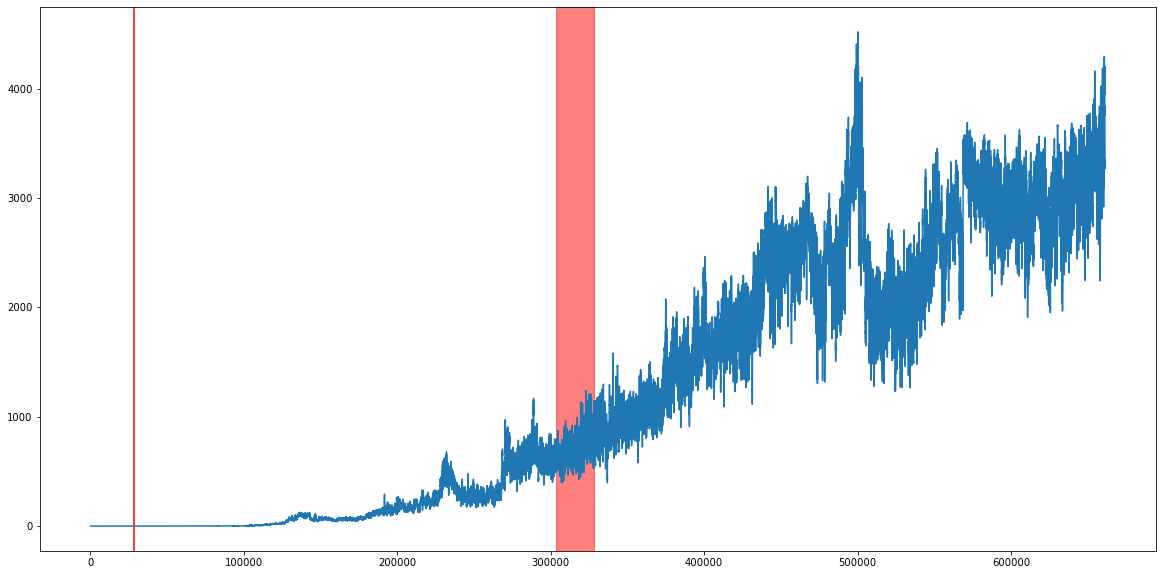

In [51]:
plt.figure(figsize=(20,10))
window_range=144
plt.axvspan(bb21, bb22, color='red', alpha=0.5)
plt.axvline(bb1, color='red')

plt.plot(
    #df.block[100000:102000],
    df.no_active_black_clusters.rolling(window=144).mean()
)

plt.show()

this figure shows the moving average(window 1000 blocks) of the number of active black users.

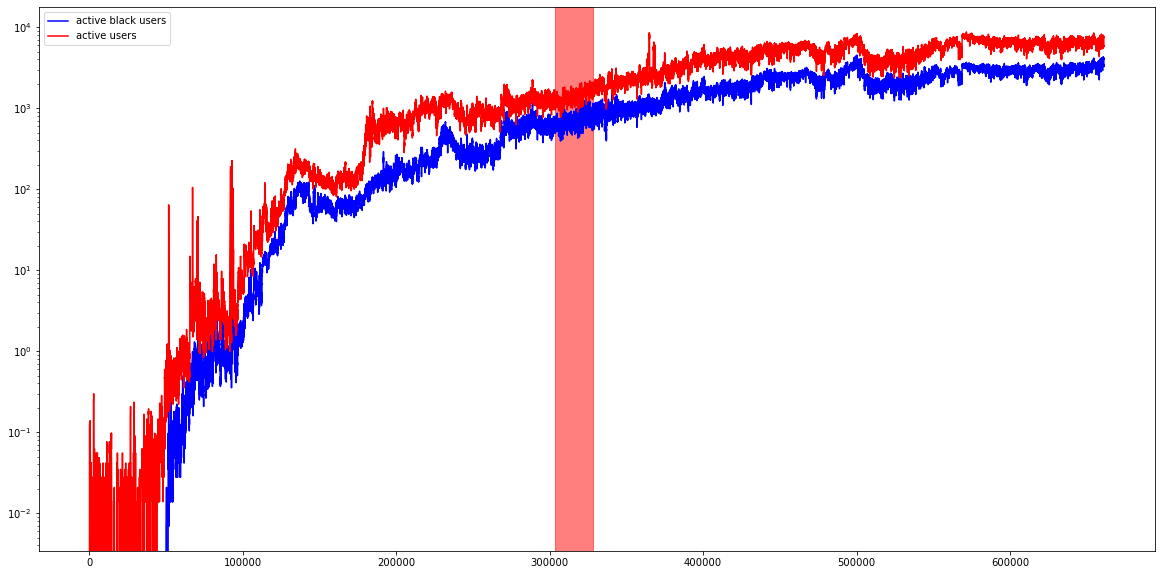

In [52]:
plt.figure(figsize=(20,10))
# plt.figure()
window_range=144
plt.axvspan(bb21, bb22, color='red', alpha=0.5)
# plt.axvline(bb1, color='red')

plt.plot(
    #df.block[100000:102000],
    df.no_active_black_clusters.rolling(window=window_range).mean(),
    color = 'blue',
    label='active black users'
)

plt.plot(
    #df.block[100000:102000],
    (df.no_clusters_input+df.no_clusters_output).rolling(window=window_range).mean(),
    color='r',
    label='active users'
)

plt.legend()
plt.yscale('log')

plt.show()

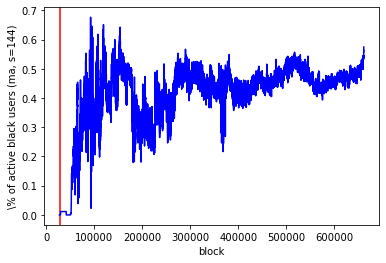

In [70]:
plt.figure()

window_range = 144
#plt.axvspan(bb21, bb22, color='red', alpha=0.5)
plt.axvline(bb1, color='red')

plt.plot(
    #df.block[100000:102000],
    (df.no_active_black_clusters/(df.no_clusters_input+df.no_clusters_output)).dropna().rolling(window=window_range).mean(),
    color='blue',
    label='% of black user per block'
)
plt.xlabel('block')
plt.ylabel(f'\% of active black users (ma, s={window_range})')
plt.savefig(f'uniform_black/heur_2_data/figs/active_pc_rw{window_range}.pdf')
plt.show()

the `dropna` is there because some blocks are empty(zero users). Those blocks would produce na, meaning holes in the plot.
A plot of the number of empty blocks follows:

### Empty blocks exists

In [133]:
df['no_clusters'] = df.no_clusters_input + df.no_clusters_output
df['zero_clusters'] = pd.Series(df.no_clusters, dtype=bool).apply(lambda x: int(not x))

In [54]:
step = 1000

a = np.array(df.zero_clusters)
n = len(a)
b = np.zeros(n//step)
c = np.zeros(n)
j = 0
i = 0
for j in range(len(b)):
    for i in range(step):
        b[j] += a[j*step+i]
        c[j*step] = b[j]
    
plt.figure(figsize=(20,10))
plt.plot( step*np.array( range(200,len(b))), b[200:], 'o')
plt.xlabel('block')
plt.ylabel('')
plt.show()
    

AttributeError: 'DataFrame' object has no attribute 'zero_clusters'

there seems to be some no users block, bettween 0 and at least 20 each 1000 blocks... may be a bug?
No, actually [Empty blocks are a thing](https://www.theblockcrypto.com/linked/1964/close-to-19-of-mined-bitcoin-blocks-were-empty)

# Plot: number of cumulative black users
Black nodes cumulative over time

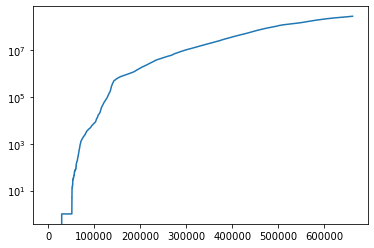

In [55]:
plt.figure()

plt.plot(
    df.block,
    df.no_black_clusters_cumulative
)


plt.yscale("log")
plt.show()

# Plot: active, new, old, cumulative users
- old black users are users who happear on the daily network and are already black before the diffusion trought transactions(the set is larger than ground truth users)

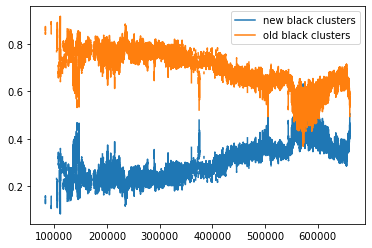

In [72]:
plt.figure()
window_range=50
plt.plot(
    df.block,
    (df.no_new_black_clusters/df.no_active_black_clusters).rolling(window=window_range).mean(),
    label='new black clusters'
)
plt.plot(
    df.block,
    (df.no_old_black_clusters/df.no_active_black_clusters).rolling(window=window_range).mean(),
    label='old black clusters'
)

# plt.yscale("log")
plt.legend()
plt.savefig(f'uniform_black/heur_2_data/figs/new_vs_old_pc_rw{window_range}.pdf')
plt.show()

# Plot: mixing evolution

We are interested in studying how black nodes mix with normal nodes over time

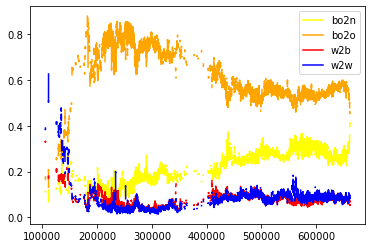

In [75]:
plt.figure()
window_range=144
plt.plot(
    df.block,
    (df.black_old2new_no_links/df.no_links).rolling(window=window_range).mean(),
    label = "bo2n",
    color='yellow'
)

plt.plot(
    df.block,
    (df.black_old2old_no_links/df.no_links).rolling(window=window_range).mean(),
    label = "bo2o",
    color='orange'
)

plt.plot(
    df.block,
    (df.white2black_no_links/df.no_links).rolling(window=window_range).mean(),
    label = "w2b",
    color='red'
)

plt.plot(
    df.block,
    (df.white2white_no_links/df.no_links).rolling(window=window_range).mean(),
    label = "w2w",
    color='blue'
)

plt.legend()
plt.savefig(f'uniform_black/heur_2_data/figs/links_pc_rw{window_range}.pdf')

# plt.yscale("log")
plt.show()

* `b2n`: no. of links from previous black nodes to new nodes which become black for the first time
* `b2b`: no. of links from previous black nodes to previous black nodes
* `n2n`: no. of links between not black nodes

the following formula holds:
$$
L = L^{b2n} + L^{b2n} + L^{n2n}
$$

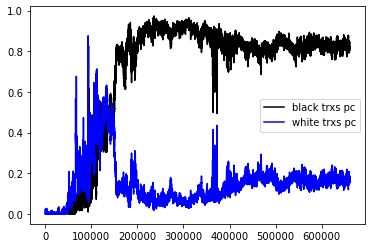

In [74]:
plt.figure()
window_range=144
plt.plot(
    df.block,
    (df.no_black_trxs/df.total_trxs).rolling(window=window_range).mean(),
    label = "black trxs pc",
    color='black'
)

plt.plot(
    df.block,
    (df.no_white_trxs/df.total_trxs).rolling(window=window_range).mean(),
    label = "white trxs pc",
    color='blue'
)

plt.legend()
plt.savefig(f'uniform_black/heur_2_data/figs/trxs_pc_rw{window_range}.pdf')


plt.show()

From this last figure I understand two main things:
- we can identify two periods: from 2012 top 2016 more links between black nodes than outside, after 2018 until 2020 more spreading to new nodes than among black to black nodes
- the number of black spreading links decreases as a percentage over the total number of links.

### questions
- when was the ground truth collected? The collection period may explain the difference in volumes between b2b and b2n depending on time.

the number of active black nodes as a percentage over the total number of nodes is larger than the percentage of active black links. 

question: **Are black nodes somewhat less active?**

# next steps:

- retrieve ground truth users first appearence on blockchain
- black nodes mixing: 
    * modified modularity:
        $$
            \sum_{v \in \text{black nodes}, w \in \text{not black nodes}} \left(a_{vw} - \frac{k^{out}_v k^{in}_w + k^{in}_v k^{out}_w}{2m} \right)
        $$
        The difference measures the difference between actual links between blacknnodes and not. 
        cons: it is not normalized. hard to interpretate.
    * DBCM randomization: we cand define the z-score on the DBCM ensemble:
        $$
        z = \frac{L_{b2n} - \langle L_{b2n} \rangle}{\sigma[L_{b2n}]}
        $$
        this should measure wheter the amount of mixing(diffusion) of black nodes is more or less than a randomized version.
        this may work better.
        